In [1]:
import numpy as np
import h5py

In [2]:

def calc_chi2(y, err, yfit , v = True):
    """
    Compute chi2 between data and fitted curve

    Parameters
    ----------
    y: array
        y values of data
    err: array (1D or 2D)
        either error bars (if independent data points)
        or covariance matrix
    yfit: array
        fitted values of data
    v: bool
        verbose output

    Returns
    -------
    chi2: float
    """
    if err.shape == (len(y),len(y)):
        #use full covariance
        if v:
            print('cov_mat chi2')
        inv_cov = np.linalg.inv( np.matrix(err) )
        chi2 = 0
        for i in range(len(y)):
            for j in range(len(y)):
                chi2 = chi2 + (y[i]-yfit[i])*inv_cov[i,j]*(y[j]-yfit[j])
        return chi2
        
    elif err.shape == (len(y),):
        if v:
            print('diagonal chi2')
        return sum(((y-yfit)**2.)/(err**2.))
    else:
        raise IOError('error in err or cov_mat input shape')

collapsed cells below are desy1:

In [3]:
desy1t = h5py.File('../TXPipe/data/desy1/outputs/tau_stats.hdf5','r')
desy1r = h5py.File('../TXPipe/data/desy1/outputs/rowe_stats.hdf5','r')
desy1_tau = np.append(desy1t['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy1t['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy1t['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy1_cov = desy1t['tau_statistics/tau_PSF-reserved/cov'][:]
desy1_cov_diag = desy1t['tau_statistics/tau_PSF-reserved/cov'][:]
desy1_fit = np.append(desy1t['tau_statistics/bestfits_PSF-reserved/alpha']*desy1r['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/beta']*desy1r['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/eta']*desy1r['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy1t['tau_statistics/bestfits_PSF-reserved/alpha']*desy1r['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/beta']*desy1r['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/eta']*desy1r['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy1t['tau_statistics/bestfits_PSF-reserved/alpha']*desy1r['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/beta']*desy1r['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/eta']*desy1r['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])
desy1t.close()
desy1r.close()


In [4]:
print(np.shape(desy1_cov))
print(np.shape(desy1_tau))
print(np.shape(desy1_fit))

(60, 60)
(60,)
(60,)


In [5]:
desy1_chisq = calc_chi2(desy1_tau,desy1_cov,desy1_fit)
print(desy1_chisq/(60))

cov_mat chi2
24.40873888534674


desy3 bootstrap:

In [6]:
desy3t = h5py.File('../TXPipe/data/desy3/outputs/tau_stats.hdf5','r')
desy3r = h5py.File('../TXPipe/data/desy3/outputs/rowe_stats.hdf5','r')
desy3_tau = np.append(desy3t['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy3t['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy3t['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy3_cov = desy3t['tau_statistics/tau_PSF-reserved/cov'][:]
desy3_fit = np.append(desy3t['tau_statistics/bestfits_PSF-reserved/alpha']*desy3r['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/beta']*desy3r['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/eta']*desy3r['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy3t['tau_statistics/bestfits_PSF-reserved/alpha']*desy3r['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/beta']*desy3r['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/eta']*desy3r['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy3t['tau_statistics/bestfits_PSF-reserved/alpha']*desy3r['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/beta']*desy3r['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/eta']*desy3r['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])
#desy3t.close()
#desy3r.close()

In [7]:
desy3_chisq = calc_chi2(desy3_tau,desy3_cov,desy3_fit)
print(desy3_chisq/(60))

cov_mat chi2
18.765127002888857


checking jackknife cov:

In [10]:
desy3tjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife/tau_stats-1.hdf5','r')
desy3rjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife/rowe_stats.hdf5','r')
desy3_taujk = np.append(desy3tjk['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy3tjk['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy3tjk['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy3_covjk = desy3tjk['tau_statistics/tau_PSF-reserved/cov'][:]
desy3_fitjk = np.append(desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])


In [11]:
desy3jk_chisq = calc_chi2(desy3_taujk,desy3_covjk,desy3_fitjk)
print(desy3jk_chisq/(60))

cov_mat chi2
1.8701220776489756e+16


In [12]:
np.shape(desy3_covjk)

(60, 60)

In [13]:
desy3_covjk[1]

array([ 8.04537738e-12,  2.26093515e-11,  1.51208732e-12,  2.62889021e-12,
        1.43838073e-12,  2.61328622e-12,  9.52275436e-13,  8.21375414e-13,
        1.49428301e-12,  1.43513218e-12,  1.38355010e-12,  1.28460110e-12,
        1.19625896e-12,  1.10148752e-12,  1.14360684e-12,  1.00876656e-12,
        6.08924228e-13,  5.07706301e-13,  5.51454849e-13,  7.26518246e-13,
        1.74358633e-12, -2.73455301e-12,  6.14827018e-13, -8.24933635e-13,
        4.81777813e-13,  1.44408942e-13,  2.62659058e-14, -3.04819958e-14,
       -4.83142222e-14,  4.90184378e-14,  1.58535108e-14,  4.06008231e-14,
       -1.33161452e-14,  2.01858030e-14,  4.76532711e-15, -1.50322432e-15,
        5.34761666e-15,  2.97821759e-15,  1.90029464e-15,  6.22160552e-15,
        1.40239835e-13, -2.00051841e-13,  9.82074753e-14,  4.27911354e-14,
        1.42166796e-14, -4.02371271e-14, -1.80384138e-14,  9.47593131e-15,
       -8.68097567e-15, -1.01988559e-15,  1.49721443e-15,  6.40527370e-17,
        2.86344851e-16, -

In [14]:
lst = range(10)
cov_sum = np.zeros((60,60))
for i in lst:
    with h5py.File(f'../TXPipe/data/desy3/outputs_jkknife/tau_stats-{i+1}.hdf5') as f:
        cov_sum = cov_sum+f['tau_statistics/tau_PSF-reserved/cov'][:] 
    cov_avg = cov_sum/10

In [15]:
print(calc_chi2(desy3_taujk,cov_avg,desy3_fitjk))

cov_mat chi2
13995.84952691346


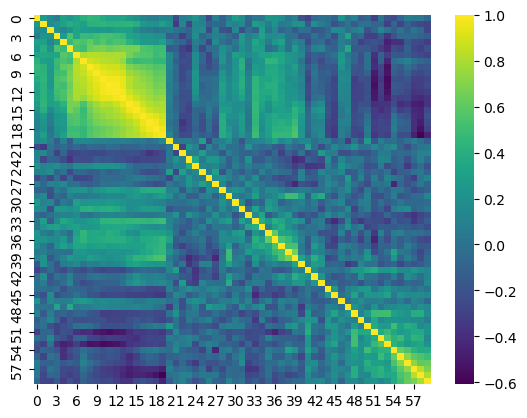

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def norm_cov(cov):
    norm = cov.copy()
    for i in range(len(cov)):
        for j in range(len(cov)):
            norm[i][j] /= np.sqrt(cov[i][i]*cov[j][j])
    return norm

ax = sns.heatmap(norm_cov(cov_avg),cmap='viridis')
plt.show()